# GeneticAlgorithm Shortest Flight Path

In [132]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tempfile import TemporaryFile

max value population fitness distribution: 


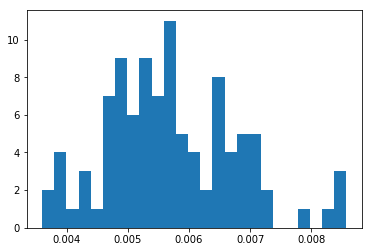

min value population distance distribution: 


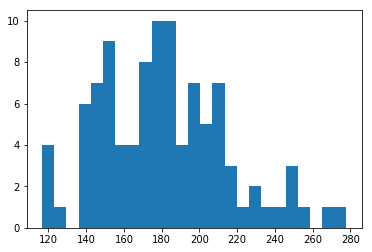

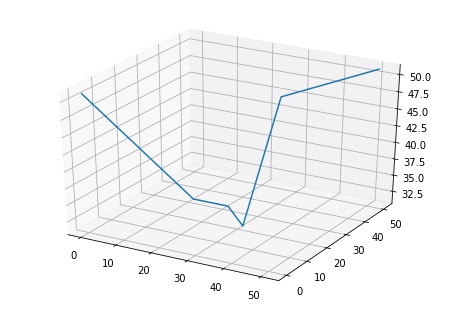

IndexError: index 0 is out of bounds for axis 0 with size 0

In [139]:
x = np.linspace(1, 51, num=6)
y = np.linspace(1, 51, num=6)
z = np.linspace(1, 51, num=6)

def createRoute(coordX, coordY, coordZ):
    X = np.random.choice(coordX, size=len(coordX), replace=True, p=None)
    Y = np.random.choice(coordY, size=len(coordY), replace=True, p=None)
    Z = np.random.choice(coordZ, size=len(coordZ), replace=True, p=None)
    # START POINT
    X = np.linspace(1, 51, num=6)
    Y[0] = 0
    Z[0] = 51
    Z[5] = 51    
    X[0] = 0
    Y[5] = 51
    return (X,Y,Z)

def initialPopulation(popSize, coordX, coordY, coordZ, warm_start=True):
    if (warm_start==True):
#        outfile = TemporaryFile()
#        outfile.seek(0) # Only needed here to simulate closing & reopening file
        population_arr = np.load('outfile.npy')
    else:
        population = []
        for i in range(0, popSize):
            population.append(createRoute(coordX, coordY, coordZ))
            population_arr = np.asarray(population)
#        outfile = TemporaryFile()
    return population_arr

def distanceCalculate(arrays):
    distance = []
    for num in range (0, len(arrays)):
        distance = np.append(distance, np.sum(np.sqrt(np.sum(( np.diff((arrays)[num][0])**2, np.diff(arrays[num][1])**2, np.diff(arrays[num][2])**2), axis=0))))
    return distance

def fitnessScore(arrays):
    fitness = np.array([])
    fitness = 1/distanceCalculate(arrays)
    return fitness

import heapq
def Selection(arrays):
    sorted_arrays = np.sort(fitnessScore(arrays))
    largestFitness = (sorted_arrays[-1], sorted_arrays[-2])
    if (largestFitness[0] == largestFitness[1]):
        largestindexes1 = np.where(fitnessScore(population) == largestFitness[0])
        largestindexes2 = np.where(fitnessScore(population) == largestFitness[1])
        largestindexes1 = np.array([largestindexes1[0][0]])
        largestindexes2 = np.array([largestindexes2[0][0]])
    else:
        largestindexes1 = np.where(fitnessScore(population) == largestFitness[0])
        largestindexes2 = np.where(fitnessScore(population) == largestFitness[1])
        largestindexes1 = np.array([largestindexes1[0][0]])
        largestindexes2 = np.array([largestindexes2[0][0]])
    population1 = (population[largestindexes1])
    population2 = (population[largestindexes2])
    return (largestindexes1, largestindexes2)

# Give two best arrays to Crossover(arrays) and make mutations, 
# then return childs and append to population if their 
# fitness score is better (larger)
def Crossover(array1, array2):
    rand = np.random.randint(1, array1[0][0].size-1)    
    # do crossover for X Y and Z, (inefective coppying..)
#    array1[0][0][1:rand], array2[0][0][1:rand] = array2[0][0][1:rand].copy(), array1[0][0][1:rand].copy()
    array1[0][1][1:rand], array2[0][1][1:rand] = array2[0][1][1:rand].copy(), array1[0][1][1:rand].copy()
    array1[0][2][1:rand], array2[0][2][1:rand] = array2[0][2][1:rand].copy(), array1[0][2][1:rand].copy()
    
    # do mutation (inefective coppying..)

    rand2 = np.random.randint(0, array1[0][0].size)
    rand3 = np.random.randint(0, array1[0][0].size) 
    rand4 = np.random.randint(0, 51)
    rand5 = np.random.randint(0, 51)
    rand6 = np.random.randint(0, 51)
    rand7 = np.random.randint(0, 51)
    rand8 = np.random.randint(0, 51)
    rand9 = np.random.randint(0, 51)

    if (rand2 < rand3):
 #       array1[0][0][rand2+1:rand3-1], array2[0][0][rand2+1:rand3-1] = rand4, rand5
        array1[0][1][rand2+1:rand3-1], array2[0][1][rand2+1:rand3-1] = rand6, rand7
        array1[0][2][rand2+1:rand3-1], array2[0][2][rand2+1:rand3-1] = rand8, rand9
    else:
 #       array1[0][0][rand3+1:rand2-1], array2[0][0][rand3+1:rand2-1] = rand4, rand5
        array1[0][1][rand3+1:rand2-1], array2[0][1][rand3+1:rand2-1] = rand6, rand7
        array1[0][2][rand3+1:rand2-1], array2[0][2][rand3+1:rand2-1] = rand8, rand9
    crossover = (array1, array2)
    return np.squeeze(crossover)

init_population = initialPopulation(100, x,y,z, warm_start=False)

#print population
print "max value population fitness distribution: "
plt.hist(fitnessScore(init_population), bins=25)
plt.show()
print "min value population distance distribution: "
plt.hist(distanceCalculate(init_population), bins=25)
plt.show()

index = []
score = []

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)
ax.plot(init_population[np.argmax(fitnessScore(init_population))][0], init_population[np.argmax(fitnessScore(init_population))][1], init_population[np.argmax(fitnessScore(init_population))][2])
pyplot.show()


# Genetic algorithm (later for -> while and move to function with some stop condition)
def geneticAlgorithm(GA_population, save_output=True):
    for i in range(0,500):
        # generated child from best members of population
        bestmembers = Selection(GA_population)
        child = Crossover(GA_population[bestmembers[0]], GA_population[bestmembers[1]])
        index.append(i)
        score.append(max(fitnessScore(GA_population)))
        index_worst_pop = np.argmin(fitnessScore(GA_population))
        index_best_fit = np.argmax(fitnessScore(child))

        if (fitnessScore(child)[index_best_fit] >= fitnessScore(population)[index_worst_pop]):
            population = np.delete(population, index_worst_pop, axis=0)
            population = np.concatenate((population, [child[index_best_fit]]), axis=0)
        else:
            continue
    if (save_output==True):
        np.save('outfile.npy', population_arr)
    return population

GA_population = initialPopulation(100, x,y,z, warm_start=False)
population = geneticAlgorithm(init_population, save_output=False)

plt.plot(index, score)
print "Cost Function max. value: ", np.max(fitnessScore(population)), "\n"
print "Distance to Target", 1/np.max(fitnessScore(population))

fig = pyplot.figure()
ax1 = Axes3D(fig)

ax1.plot(population[np.argmax(fitnessScore(population))][0], population[np.argmax(fitnessScore(population))][1], population[np.argmax(fitnessScore(population))][2])
pyplot.show()

print population[np.argmax(fitnessScore(population))]

In [130]:
xxx = np.load('outfile.npy')
xxx

array([[[ 0., 11., 21., 31., 41., 51.],
        [ 0., 21.,  1., 51.,  1., 51.],
        [51., 31., 31., 41., 41., 51.]],

       [[ 0., 11., 21., 31., 41., 51.],
        [ 0., 41., 51.,  1., 21., 51.],
        [51., 41.,  1., 41., 41., 51.]],

       [[ 0., 11., 21., 31., 41., 51.],
        [ 0., 31., 41.,  1., 51., 51.],
        [51., 21.,  1., 41., 21., 51.]],

       ...,

       [[ 0., 11., 21., 31., 41., 51.],
        [ 0.,  1., 51., 41.,  1., 51.],
        [51., 41., 31., 51., 11., 51.]],

       [[ 0., 11., 21., 31., 41., 51.],
        [ 0., 11., 51., 51., 51., 51.],
        [51., 31., 11., 31., 21., 51.]],

       [[ 0., 11., 21., 31., 41., 51.],
        [ 0., 31., 41., 41., 51., 51.],
        [51., 21.,  1., 11., 11., 51.]]])

In [45]:
outfile.seek(0) # Only needed here to simulate closing & reopening file
population_arr = np.load(outfile)
print population_arr

[[[ 0. 11. 21. 31. 41. 51.]
  [ 0. 10. 10. 10. 10. 51.]
  [ 0. 12. 12. 12. 12. 51.]]

 [[ 0. 11. 21. 31. 41. 51.]
  [ 0. 10. 10. 10. 10. 51.]
  [ 0. 12. 12. 12. 12. 51.]]

 [[ 0. 11. 21. 31. 41. 51.]
  [ 0. 10. 10. 10. 10. 51.]
  [ 0. 12. 12. 12. 12. 51.]]

 ...

 [[ 0. 11. 21. 31. 41. 51.]
  [ 0. 10. 17. 17. 23. 51.]
  [ 0. 12. 21. 21. 23. 51.]]

 [[ 0. 11. 21. 31. 41. 51.]
  [ 0. 10. 17. 17. 23. 51.]
  [ 0. 12. 21. 21. 23. 51.]]

 [[ 0. 11. 21. 31. 41. 51.]
  [ 0. 10. 17. 17. 23. 51.]
  [ 0. 12. 21. 21. 23. 51.]]]


In [7]:
# A* Shortest Path Algorithm
# http://en.wikipedia.org/wiki/A*
# FB - 201012256
from heapq import heappush, heappop # for priority queue
import math
import time
import random

class node:
    xPos = 0 # x position
    yPos = 0 # y position
    distance = 0 # total distance already travelled to reach the node
    priority = 0 # priority = distance + remaining distance estimate
    def __init__(self, xPos, yPos, distance, priority):
        self.xPos = xPos
        self.yPos = yPos
        self.distance = distance
        self.priority = priority
    def __lt__(self, other): # comparison method for priority queue
        return self.priority < other.priority
    def updatePriority(self, xDest, yDest):
        self.priority = self.distance + self.estimate(xDest, yDest) * 10 # A*
    # give higher priority to going straight instead of diagonally
    def nextMove(self, dirs, d): # d: direction to move
        if dirs == 8 and d % 2 != 0:
            self.distance += 14
        else:
            self.distance += 10
    # Estimation function for the remaining distance to the goal.
    def estimate(self, xDest, yDest):
        xd = xDest - self.xPos
        yd = yDest - self.yPos
        # Euclidian Distance
        d = math.sqrt(xd * xd + yd * yd)
        # Manhattan distance
        # d = abs(xd) + abs(yd)
        # Chebyshev distance
        # d = max(abs(xd), abs(yd))
        return(d)

# A-star algorithm.
# The path returned will be a string of digits of directions.
def pathFind(the_map, n, m, dirs, dx, dy, xA, yA, xB, yB):
    closed_nodes_map = [] # map of closed (tried-out) nodes
    open_nodes_map = [] # map of open (not-yet-tried) nodes
    dir_map = [] # map of dirs
    row = [0] * n
    for i in range(m): # create 2d arrays
        closed_nodes_map.append(list(row))
        open_nodes_map.append(list(row))
        dir_map.append(list(row))

    pq = [[], []] # priority queues of open (not-yet-tried) nodes
    pqi = 0 # priority queue index
    # create the start node and push into list of open nodes
    n0 = node(xA, yA, 0, 0)
    n0.updatePriority(xB, yB)
    heappush(pq[pqi], n0)
    open_nodes_map[yA][xA] = n0.priority # mark it on the open nodes map

    # A* search
    while len(pq[pqi]) > 0:
        # get the current node w/ the highest priority
        # from the list of open nodes
        n1 = pq[pqi][0] # top node
        n0 = node(n1.xPos, n1.yPos, n1.distance, n1.priority)
        x = n0.xPos
        y = n0.yPos
        heappop(pq[pqi]) # remove the node from the open list
        open_nodes_map[y][x] = 0
        closed_nodes_map[y][x] = 1 # mark it on the closed nodes map

        # quit searching when the goal is reached
        # if n0.estimate(xB, yB) == 0:
        if x == xB and y == yB:
            # generate the path from finish to start
            # by following the dirs
            path = ''
            while not (x == xA and y == yA):
                j = dir_map[y][x]
                c = str((j + dirs / 2) % dirs)
                path = c + path
                x += dx[j]
                y += dy[j]
            return path

        # generate moves (child nodes) in all possible dirs
        for i in range(dirs):
            xdx = x + dx[i]
            ydy = y + dy[i]
            if not (xdx < 0 or xdx > n-1 or ydy < 0 or ydy > m - 1
                    or the_map[ydy][xdx] == 1 or closed_nodes_map[ydy][xdx] == 1):
                # generate a child node
                m0 = node(xdx, ydy, n0.distance, n0.priority)
                m0.nextMove(dirs, i)
                m0.updatePriority(xB, yB)
                # if it is not in the open list then add into that
                if open_nodes_map[ydy][xdx] == 0:
                    open_nodes_map[ydy][xdx] = m0.priority
                    heappush(pq[pqi], m0)
                    # mark its parent node direction
                    dir_map[ydy][xdx] = (i + dirs / 2) % dirs
                elif open_nodes_map[ydy][xdx] > m0.priority:
                    # update the priority
                    open_nodes_map[ydy][xdx] = m0.priority
                    # update the parent direction
                    dir_map[ydy][xdx] = (i + dirs / 2) % dirs
                    # replace the node
                    # by emptying one pq to the other one
                    # except the node to be replaced will be ignored
                    # and the new node will be pushed in instead
                    while not (pq[pqi][0].xPos == xdx and pq[pqi][0].yPos == ydy):
                        heappush(pq[1 - pqi], pq[pqi][0])
                        heappop(pq[pqi])
                    heappop(pq[pqi]) # remove the target node
                    # empty the larger size priority queue to the smaller one
                    if len(pq[pqi]) > len(pq[1 - pqi]):
                        pqi = 1 - pqi
                    while len(pq[pqi]) > 0:
                        heappush(pq[1-pqi], pq[pqi][0])
                        heappop(pq[pqi])       
                    pqi = 1 - pqi
                    heappush(pq[pqi], m0) # add the better node instead
    return '' # if no route found

# MAIN
dirs = 8 # number of possible directions to move on the map
if dirs == 4:
    dx = [1, 0, -1, 0]
    dy = [0, 1, 0, -1]
elif dirs == 8:
    dx = [1, 1, 0, -1, -1, -1, 0, 1]
    dy = [0, 1, 1, 1, 0, -1, -1, -1]

n = 30 # horizontal size of the map
m = 30 # vertical size of the map
the_map = []
row = [0] * n
for i in range(m): # create empty map
    the_map.append(list(row))

# fillout the map with a '+' pattern
for x in range(n / 8, n * 7 / 8):
    the_map[m / 2][x] = 1
for y in range(m/8, m * 7 / 8):
    the_map[y][n / 2] = 1

# randomly select start and finish locations from a list
sf = []
sf.append((0, 0, n - 1, m - 1))
sf.append((0, m - 1, n - 1, 0))
sf.append((n / 2 - 1, m / 2 - 1, n / 2 + 1, m / 2 + 1))
sf.append((n / 2 - 1, m / 2 + 1, n / 2 + 1, m / 2 - 1))
sf.append((n / 2 - 1, 0, n / 2 + 1, m - 1))
sf.append((n / 2 + 1, m - 1, n / 2 - 1, 0))
sf.append((0, m / 2 - 1, n - 1, m / 2 + 1))
sf.append((n - 1, m / 2 + 1, 0, m / 2 - 1))
(xA, yA, xB, yB) = random.choice(sf)

print 'Map size (X,Y): ', n, m
print 'Start: ', xA, yA
print 'Finish: ', xB, yB
t = time.time()
route = pathFind(the_map, n, m, dirs, dx, dy, xA, yA, xB, yB)
print 'Time to generate the route (seconds): ', time.time() - t
print 'Route:'
print route

# mark the route on the map
if len(route) > 0:
    x = xA
    y = yA
    the_map[y][x] = 2
    for i in range(len(route)):
        j = int(route[i])
        x += dx[j]
        y += dy[j]
        the_map[y][x] = 3
    the_map[y][x] = 4

# display the map with the route added
print 'Map:'
for y in range(m):
    for x in range(n):
        xy = the_map[y][x]
        if xy == 0:
            print '.', # space
        elif xy == 1:
            print 'O', # obstacle
        elif xy == 2:
            print 'S', # start
        elif xy == 3:
            print 'R', # route
        elif xy == 4:
            print 'F', # finish
    print



Map size (X,Y):  30 30
Start:  14 0
Finish:  16 29
Time to generate the route (seconds):  0.0490000247955
Route:
21122111111111133333332323232
Map:
. . . . . . . . . . . . . . S . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . R . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . R . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . O R . . . . . . . . . . . . .
. . . . . . . . . . . . . . . O R . . . . . . . . . . . . .
. . . . . . . . . . . . . . . O R . . . . . . . . . . . . .
. . . . . . . . . . . . . . . O . R . . . . . . . . . . . .
. . . . . . . . . . . . . . . O . . R . . . . . . . . . . .
. . . . . . . . . . . . . . . O . . . R . . . . . . . . . .
. . . . . . . . . . . . . . . O . . . . R . . . . . . . . .
. . . . . . . . . . . . . . . O . . . . . R . . . . . . . .
. . . . . . . . . . . . . . . O . . . . . . R . . . . . . .
. . . . . . . . . . . . . . . O . . . . . . . R . . . . . .
. . . . . . . . . . . . . . . O . . . . . . . . R . . . . .
. . . . . . 

In [ ]:
import cv2
import numpy as np
import heapq

# no of rows and columns in grid
rows = 10
columns = 10


def grid_map(img):
    # create a 2d array
    grid = np.zeros((rows, columns))
    for i in range(rows):
        for j in range(columns):
            # white blocks
            if (np.array_equal(img[20+(i*40), 20+(j*40)], [255, 255, 255])):
                grid[i][j] = 0
            # start -> orange block
            elif (np.array_equal(img[20+(i*40), 20+(j*40)], [39, 127, 255])):
                grid[i][j] = 2
            # end -> pink block
            elif (np.array_equal(img[20+(i*40), 20+(j*40)], [201, 174, 255])):
                grid[i][j] = 3
            # obstacles ->black blocks
            else:
                grid[i][j] = 1
    return grid


class Cell(object):
    def __init__(self, x, y, reachable):
        # setting some parameters for each cell
        self.reachable = reachable
        self.x = x
        self.y = y
        self.parent = None
        self.cost = 0
        self.heuristic = 0
        # net_cost=cost+heuristic
        self.net_cost = 0


class Astar(object):
    def __init__(self):
        # list of unchecked neighbour cells
        self.open = []
        # keeps cells with lowest total_cost at top
        heapq.heapify(self.open)
        # list of already checked cells
        self.closed = set()
        # list of neighbour cells
        self.cells = []

    def init_grid(self, grid):
        for i in range(rows):
            for j in range(columns):
                # detecting the obstacles
                if grid[i][j] == 1:
                    reachable = False
                else:
                    reachable = True
                self.cells.append(Cell(i, j, reachable))
                # detecting the start and end
                if(grid[i][j] == 2):
                    self.start = self.cell(i, j)
                if(grid[i][j] == 3):
                    self.end = self.cell(i, j)

    def cell(self, x, y):
        # returns the location to identify each cell
        return self.cells[x*columns+y]

    def cell_heuristic(self, cell):
        # returns the heuristic for astar algo
        return abs(cell.x-self.end.x)+abs(cell.y-self.end.y)

    def neighbour(self, cell):
        cells = []
        # returns a list of neigbours of a cell
        if cell.x < columns - 1:
            cells.append(self.cell(cell.x+1, cell.y))
        if cell.x > 0:
            cells.append(self.cell(cell.x-1, cell.y))
        if cell.y < rows-1:
            cells.append(self.cell(cell.x, cell.y+1))
        if cell.y > 0:
            cells.append(self.cell(cell.x, cell.y-1))
        return cells

    def update_cell(self, adj, cell):
        # update the details about the selected neigbour cell
        adj.cost = cell.cost + 1
        adj.heuristic = self.cell_heuristic(adj)
        adj.parent = cell
        adj.net_cost = adj.cost + adj.heuristic

    def display_path(self):
        # list for storing the path
        route_path = []
        # flag to determine length of path
        count = 0
        cell = self.end
        while cell.parent is not None:
            # storing the parents in list from end to start
            route_path.append([(cell.y)+1, (cell.x)+1])
            cell = cell.parent
            count += 1
        return route_path, count

    def search(self):
        # pushing the first element in open queue
        heapq.heappush(self.open, (self.start.net_cost, self.start))
        while(len(self.open)):
            net_cost, cell = heapq.heappop(self.open)
            # adding the checked cell to closed list
            self.closed.add(cell)
            if cell is self.end:
                # store path and path legth
                route_path, route_length = self.display_path()
                route_path.reverse()
                break
            # getting the adjoint cells
            neighbours = self.neighbour(cell)
            for path in neighbours:
                # if cell is not an obstacle and has not been already checked
                if path.reachable and path not in self.closed:
                    if (path.net_cost, path) in self.open:
                        # selecting the cell with least cost
                        if path.cost > cell.cost + 1:
                            self.update_cell(path, cell)
                    else:
                        self.update_cell(path, cell)
                        heapq.heappush(self.open, (path.net_cost, path))
        return route_path, route_length


def play(img):
    # map the grid in an array
    grid = grid_map(img)

    # executing A*
    solution = Astar()
    solution.init_grid(grid)
    route_path, route_length = solution.search()

    return route_length, route_path


if __name__ == "__main__":
    # code for checking output for single image
    img = cv2.imread('SampleImages/test_image1.png')
    route_length, route_path = play(img)
    print "OUTPUT FOR SINGLE IMAGE (IMAGE 1)..."
    print "route length = ", route_length
    print "route path   = ", route_path
    # code for checking output for all images
    route_length_list = []
    route_path_list = []
    for file_number in range(1, 6):
        file_name = "SampleImages/test_image"+str(file_number)+".png"
        pic = cv2.imread(file_name)
        route_length, route_path = play(pic)
        route_length_list.append(route_length)
        route_path_list.append(route_path)
    print "OUTPUT FOR ALL IMAGES..."
    for i in range(5):
        print "route length for image ", i+1, " = ", route_length_list[i]
        print "route path for image ", i+1, " = ", route_path_list[i]